## Import Modules

In [1]:
from fbprophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


## Initiate Model

In [2]:
model = Prophet(changepoint_prior_scale=0.01)

## Read Data

In [3]:
df = pd.read_csv('model_ready_ts_nodup.csv')

In [4]:
df.head()

,Date,index,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day
0,2016-10-01 00:15:00,0,7224.17,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1
1,2016-10-01 00:30:00,1,7141.92,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1
2,2016-10-01 00:45:00,2,7121.93,10,5,30.0,24.0,70.29,0.0,0,2.0,27.4,2016,1
3,2016-10-01 01:00:00,3,7066.64,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1
4,2016-10-01 01:15:00,4,6937.04,10,5,30.0,24.0,70.29,0.0,0,2.0,0.0,2016,1


## Multivariate Forecasting

In [5]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir']]

In [6]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0
...,...,...,...,...,...,...,...,...
159810,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
159811,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
159812,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
159813,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [7]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0


In [8]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
159810,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
159811,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
159812,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
159813,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82
159814,2021-09-09 00:00:00,8430.02,28.0,26.0,88.92,50.0,9.4,100


In [9]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [10]:
mv_model = Prophet()

In [11]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')

## Now add Train-Test Split

In [12]:
train_size = int(dfmv.shape[0]*0.7)

In [13]:
df_train = dfmv.iloc[:train_size]

In [14]:
# test_size = dfuv.shape[0] - train_size

In [15]:
df_test = dfmv[train_size:]

## Fit model on Train Dataset

In [16]:
model.fit(df_train)

## Save model

In [17]:
import pickle

In [18]:
import joblib

In [19]:
joblib.dump(model, 'saved_mv_nodup_model.pkl')

['saved_mv_nodup_model.pkl']

In [20]:
saved_mv_model = joblib.load('saved_mv_nodup_model.pkl')

In [21]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
111870,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
111871,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
111872,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
111873,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
111874,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
159810,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
159811,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
159812,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
159813,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [22]:
test_ds = df_test.drop(columns='y')

In [23]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir
111870,2020-03-09 14:45:00,24.9,11.6,43.40,0.0,20.2,283
111871,2020-03-09 15:00:00,24.1,10.1,41.18,0.0,20.5,280
111872,2020-03-09 15:15:00,24.1,10.1,41.18,0.0,20.5,280
111873,2020-03-09 15:30:00,24.1,10.1,41.18,0.0,20.5,280
111874,2020-03-09 15:45:00,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...
159810,2021-09-09 23:00:00,29.0,26.8,87.64,70.3,7.8,82
159811,2021-09-09 23:15:00,29.0,26.8,87.64,70.3,7.8,82
159812,2021-09-09 23:30:00,29.0,26.8,87.64,70.3,7.8,82
159813,2021-09-09 23:45:00,29.0,26.8,87.64,70.3,7.8,82


In [24]:
# test_ds = pd.DataFrame(df_test['ds'])

In [25]:
# test_ds

## Make Forecast on Test Dataset

In [26]:
forecast = saved_mv_model.predict(test_ds)

In [27]:
test_forecast = forecast

In [28]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-09 00:00:00,5899.927490,2809.965729,5185.516616,5899.927490,5899.927490,-1892.857781,-1892.857781,-1892.857781,-147.600204,...,-348.108205,-348.108205,-348.108205,-1397.149372,-1397.149372,-1397.149372,0.0,0.0,0.0,4007.069709
1,2020-03-09 14:45:00,5900.296544,3113.899354,5340.075724,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3093.346173,5469.032098,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3184.236174,5419.963212,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,2998.846826,5420.261880,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017


In [29]:
test_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
47940,2021-12-31 22:45:00,6298.023692,2875.853955,8855.689984,3576.884599,8919.664000,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2825.189473,8823.458624,3576.809977,8919.825549,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,3020.444289,8754.118593,3576.735356,8919.987097,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2687.799233,8775.386200,3576.660735,8920.148645,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160
47944,2021-12-31 23:45:00,6298.048713,2928.886850,8541.350771,3576.586113,8920.310193,-558.063651,-558.063651,-558.063651,-100.580765,...,113.026877,113.026877,113.026877,-570.509762,-570.509762,-570.509762,0.0,0.0,0.0,5739.985062


In [30]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-09 00:00:00,4007.069709,2809.965729,5185.516616
1,2020-03-09 14:45:00,4329.350140,3113.899354,5340.075724
2,2020-03-09 15:00:00,4276.608952,3093.346173,5469.032098
3,2020-03-09 15:15:00,4230.724280,3184.236174,5419.963212
4,2020-03-09 15:30:00,4194.679017,2998.846826,5420.261880
...,...,...,...,...
47940,2021-12-31 22:45:00,5968.713073,2875.853955,8855.689984
47941,2021-12-31 23:00:00,5906.190230,2825.189473,8823.458624
47942,2021-12-31 23:15:00,5846.836418,3020.444289,8754.118593
47943,2021-12-31 23:30:00,5791.299160,2687.799233,8775.386200


## Plot test forecast with actual values

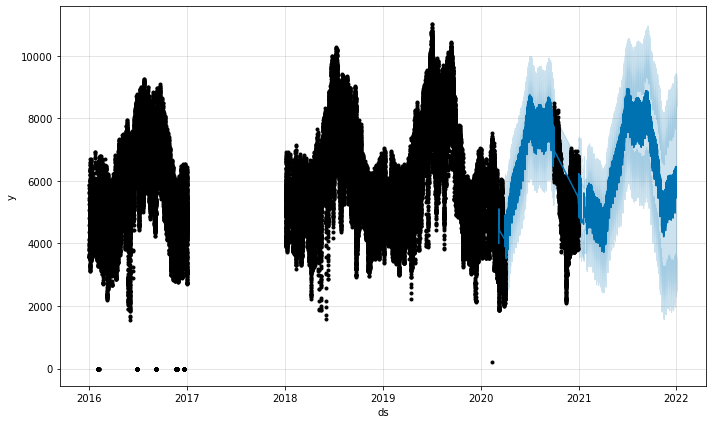

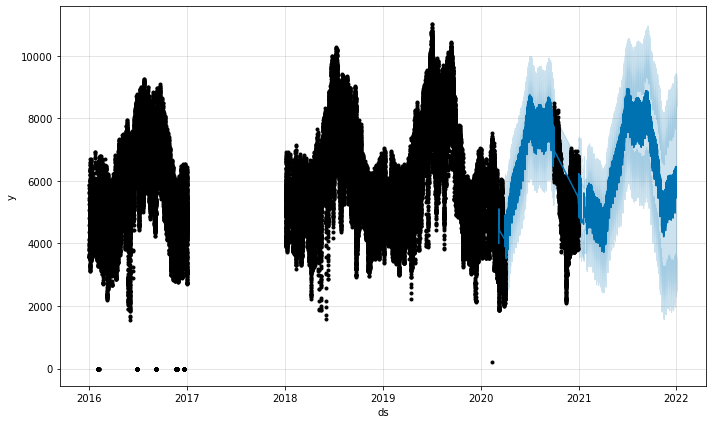

In [31]:
saved_mv_model.plot(test_forecast)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

(0.0, 12000.0)

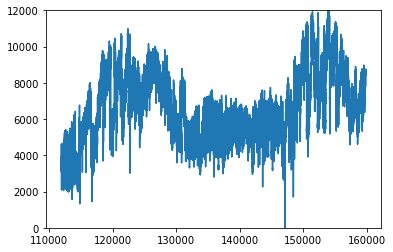

In [33]:
plt.plot(df_test['y'])
plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [34]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
111870,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
111871,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
111872,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
111873,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
111874,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
159810,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
159811,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
159812,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
159813,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


## Remove outliers

In [35]:
test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-09 00:00:00,5899.927490,2809.965729,5185.516616,5899.927490,5899.927490,-1892.857781,-1892.857781,-1892.857781,-147.600204,...,-348.108205,-348.108205,-348.108205,-1397.149372,-1397.149372,-1397.149372,0.0,0.0,0.0,4007.069709
1,2020-03-09 14:45:00,5900.296544,3113.899354,5340.075724,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3093.346173,5469.032098,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3184.236174,5419.963212,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,2998.846826,5420.261880,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2875.853955,8855.689984,3576.884599,8919.664000,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2825.189473,8823.458624,3576.809977,8919.825549,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,3020.444289,8754.118593,3576.735356,8919.987097,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2687.799233,8775.386200,3576.660735,8920.148645,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [39]:
df_test[df_test['y'] < -0.5]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir


In [38]:
df_test.drop(df_test[df_test['y'] < -0.5].index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [116]:
# test_forecast.drop(index = 54687, inplace = True)

In [117]:
# test_forecast.drop(index = 54688, inplace = True)

In [40]:
test_forecast.reset_index(inplace=True)

In [41]:
df_test.reset_index(inplace=True)

In [42]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,111870,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,111871,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,111872,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,111873,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,111874,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...,...
47938,159810,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,159811,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,159812,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
47941,159813,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [43]:
test_forecast

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-03-09 00:00:00,5899.927490,2809.965729,5185.516616,5899.927490,5899.927490,-1892.857781,-1892.857781,-1892.857781,...,-348.108205,-348.108205,-348.108205,-1397.149372,-1397.149372,-1397.149372,0.0,0.0,0.0,4007.069709
1,1,2020-03-09 14:45:00,5900.296544,3113.899354,5340.075724,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2,2020-03-09 15:00:00,5900.302799,3093.346173,5469.032098,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,3,2020-03-09 15:15:00,5900.309054,3184.236174,5419.963212,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,4,2020-03-09 15:30:00,5900.315309,2998.846826,5420.261880,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,47940,2021-12-31 22:45:00,6298.023692,2875.853955,8855.689984,3576.884599,8919.664000,-329.310619,-329.310619,-329.310619,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,47941,2021-12-31 23:00:00,6298.029948,2825.189473,8823.458624,3576.809977,8919.825549,-391.839718,-391.839718,-391.839718,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,47942,2021-12-31 23:15:00,6298.036203,3020.444289,8754.118593,3576.735356,8919.987097,-451.199784,-451.199784,-451.199784,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,47943,2021-12-31 23:30:00,6298.042458,2687.799233,8775.386200,3576.660735,8920.148645,-506.743298,-506.743298,-506.743298,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [45]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82
47941,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82


In [46]:
test_forecast

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-03-09 00:00:00,5899.927490,2809.965729,5185.516616,5899.927490,5899.927490,-1892.857781,-1892.857781,-1892.857781,...,-348.108205,-348.108205,-348.108205,-1397.149372,-1397.149372,-1397.149372,0.0,0.0,0.0,4007.069709
1,1,2020-03-09 14:45:00,5900.296544,3113.899354,5340.075724,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2,2020-03-09 15:00:00,5900.302799,3093.346173,5469.032098,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,3,2020-03-09 15:15:00,5900.309054,3184.236174,5419.963212,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,4,2020-03-09 15:30:00,5900.315309,2998.846826,5420.261880,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,47940,2021-12-31 22:45:00,6298.023692,2875.853955,8855.689984,3576.884599,8919.664000,-329.310619,-329.310619,-329.310619,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,47941,2021-12-31 23:00:00,6298.029948,2825.189473,8823.458624,3576.809977,8919.825549,-391.839718,-391.839718,-391.839718,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,47942,2021-12-31 23:15:00,6298.036203,3020.444289,8754.118593,3576.735356,8919.987097,-451.199784,-451.199784,-451.199784,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,47943,2021-12-31 23:30:00,6298.042458,2687.799233,8775.386200,3576.660735,8920.148645,-506.743298,-506.743298,-506.743298,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


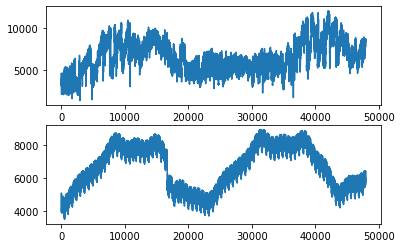

In [47]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

## Alignment Check

In [54]:
test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [58]:
test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [61]:
test_forecast.sort_index(inplace=True)

In [62]:
df_test.sort_index(inplace=True)

In [68]:
df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
test_forecast.drop(columns='index', inplace=True)

In [71]:
test_forecast['ds'].shape == df_test['ds'].shape

True

In [77]:
test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

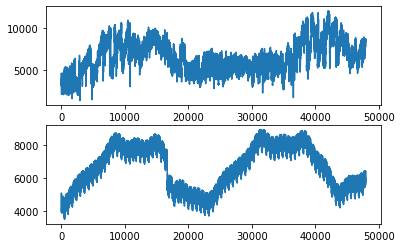

In [79]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

In [80]:
test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [81]:
df_test['ds'][0]

'2020-03-09 14:45:00'

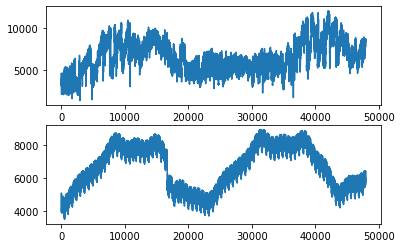

In [82]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

In [135]:
test_forecast['yhat'][test_forecast['ds'] == '2019-08-03 02:00:00']

4    7751.944987
Name: yhat, dtype: float64

In [136]:
df_test['y'][df_test['ds'] == '2019-08-03 02:00:00']

864    7914.44
Name: y, dtype: float64

## Create future Dataframes

In [47]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [48]:
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:15:00
2,2016-01-01 00:30:00
3,2016-01-01 00:45:00
4,2016-01-01 01:00:00


## Make future forecast

In [49]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125127,2020-01-20 19:45:00,5168.358648,3817.604305,6427.854630
125128,2020-01-20 20:45:00,5230.380541,4105.404309,6518.917113
125129,2020-01-20 21:45:00,5074.069517,3867.958035,6337.513628
125130,2020-01-20 22:45:00,4810.340248,3615.946853,6066.842982
125131,2020-01-20 23:45:00,4560.129886,3351.641586,5791.330540


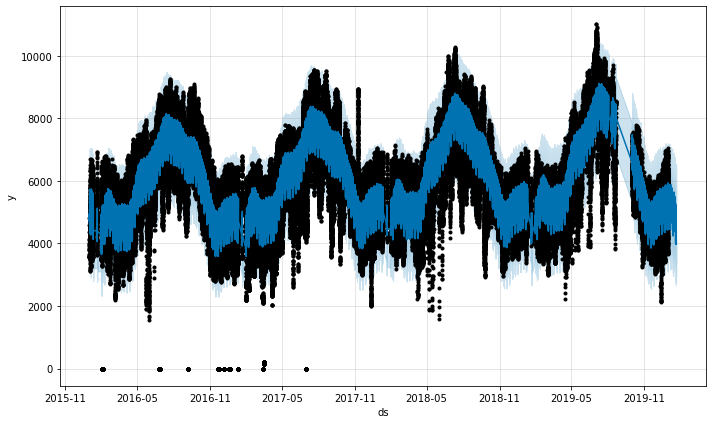

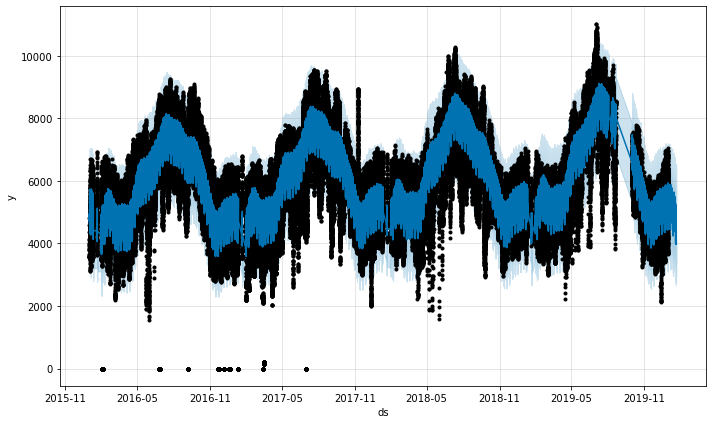

In [50]:
saved_mv_model.plot(forecast)